<a href="https://colab.research.google.com/github/ViewKridsakorn/Data-Analyst-Project/blob/main/Python/World_Companies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **About Dataset**

The provided data set appears to consist of information related to various companies. Each entry in the data set includes the following attributes :


1. **Rank :**
This attribute likely indicates the position or ranking of the company within a certain context, which could be based on revenue, market share, or some other relevant metric.

2. **Name :**
This attribute represents the name of the company, which is likely its official business name.

3. **Industry :**
This attribute specifies the industry or sector to which the company belongs. It helps categorize the company based on its primary line of business.

4. **Revenue (USD millions) :**
This attribute quantifies the company's revenue in millions of US dollars. It provides insight into the financial performance of the company.

5. **Revenue growth :**
This attribute likely indicates the rate at which the company's revenue has changed over a specific period. It could be expressed as a percentage or a numerical value.

6. **Employees :**
This attribute specifies the number of individuals employed by the company. It offers an indication of the company's size in terms of its workforce.

7. **Headquarters :**
This attribute provides information about the location of the company's main headquarters, which is typically the central administrative and operational center.

Overall, this data set seems to provide a snapshot of companies' performance, industry affiliation, and other relevant details. It could be used for comparative analysis, industry trend identification, or other business-related insights.

# 1.Data Preview

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('Largest_Companies.csv')
df.head()

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,"611,289",6.7%,"2,100,000","Bentonville, Arkansas"
1,2,Amazon,Retail and Cloud Computing,"513,983",9.4%,"1,540,000","Seattle, Washington"
2,3,Exxon Mobil,Petroleum industry,"413,680",44.8%,"62,000","Spring, Texas"
3,4,Apple,Electronics industry,"394,328",7.8%,"164,000","Cupertino, California"
4,5,UnitedHealth Group,Healthcare,"324,162",12.7%,"400,000","Minnetonka, Minnesota"


In [ ]:
#Show data structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Rank                    100 non-null    int64 
 1   Name                    100 non-null    object
 2   Industry                100 non-null    object
 3   Revenue (USD millions)  100 non-null    object
 4   Revenue growth          100 non-null    object
 5   Employees               100 non-null    object
 6   Headquarters            100 non-null    object
dtypes: int64(1), object(6)
memory usage: 5.6+ KB


# 2. Data Wranging

In [ ]:
##Drop % string in Revenue growth column and change this column name
df['Revenue growth'] = df['Revenue growth'].str.replace('%', '')

df = df.rename(columns={'Revenue growth':'Revenue growth %'})
df.head()

,Rank,Name,Industry,Revenue (USD millions),Revenue growth %,Employees,Headquarters
0,1,Walmart,Retail,"611,289",6.7,"2,100,000","Bentonville, Arkansas"
1,2,Amazon,Retail and Cloud Computing,"513,983",9.4,"1,540,000","Seattle, Washington"
2,3,Exxon Mobil,Petroleum industry,"413,680",44.8,"62,000","Spring, Texas"
3,4,Apple,Electronics industry,"394,328",7.8,"164,000","Cupertino, California"
4,5,UnitedHealth Group,Healthcare,"324,162",12.7,"400,000","Minnetonka, Minnesota"


In [ ]:
##Drop "," string in Revenue USD millions column and Employees column
df['Revenue (USD millions)'] = df['Revenue (USD millions)'].str.replace(',','')
df['Employees'] = df['Employees'].str.replace(',','')

df.head()

,Rank,Name,Industry,Revenue (USD millions),Revenue growth %,Employees,Headquarters
0,1,Walmart,Retail,611289,6.7,2100000,"Bentonville, Arkansas"
1,2,Amazon,Retail and Cloud Computing,513983,9.4,1540000,"Seattle, Washington"
2,3,Exxon Mobil,Petroleum industry,413680,44.8,62000,"Spring, Texas"
3,4,Apple,Electronics industry,394328,7.8,164000,"Cupertino, California"
4,5,UnitedHealth Group,Healthcare,324162,12.7,400000,"Minnetonka, Minnesota"


In [ ]:
##Convert datatype from string to numeric

df['Revenue (USD millions)'] = df['Revenue (USD millions)'].astype('int64')
df['Revenue growth %'] = df['Revenue growth %'].astype('float64')
df['Employees'] = df['Employees'].astype('int64')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Rank                    100 non-null    int64  
 1   Name                    100 non-null    object 
 2   Industry                100 non-null    object 
 3   Revenue (USD millions)  100 non-null    int64  
 4   Revenue growth %        100 non-null    float64
 5   Employees               100 non-null    int64  
 6   Headquarters            100 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 5.6+ KB


In [ ]:
df.isnull().sum()

Rank                      0
Name                      0
Industry                  0
Revenue (USD millions)    0
Revenue growth %          0
Employees                 0
Headquarters              0
dtype: int64

# Step 3. Explore Data Analysis

In [ ]:
## Top 10 Companies Revenue USD million

Top_companies = df[['Name','Revenue (USD millions)']]\
                .sort_values('Revenue (USD millions)',ascending = False)\
                .head(10)


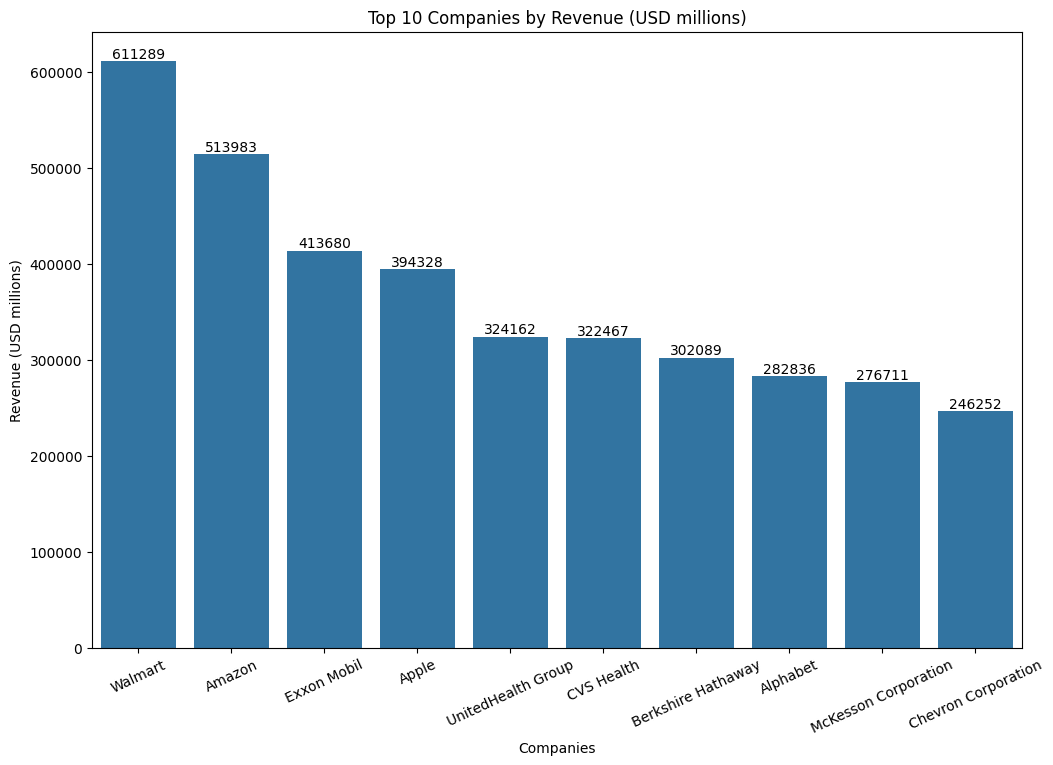

In [ ]:
## Visulization Top 10 Companies Revenue USD million

plt.figure(figsize = (12,8))
sns.barplot(Top_companies, x = 'Name',y = 'Revenue (USD millions)')

# Add labels above bars
for i, value in enumerate(Top_companies['Revenue (USD millions)']):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom')

plt.title('Top 10 Companies by Revenue (USD millions)')
plt.xlabel('Companies')
plt.xticks(rotation = 25)
plt.show()

In [ ]:
## What is a Industry have Highest Revenue(USD millions)
Top_Industry = df[['Industry','Revenue (USD millions)']]\
               .groupby('Industry')\
               .sum('Revenue (USD millions)')\
               .sort_values('Revenue (USD millions)',ascending = False)\
               .head(10)

Top_Industry

,Revenue (USD millions)
Industry,
Retail,1578909
Petroleum industry,1521225
Healthcare,1189368
Technology,930783
Financials,927262
Pharmaceutical industry,730059
Conglomerate,566459
Retail and Cloud Computing,513983
Electronics industry,394328


<ipython-input-11-1cd4568b4fef>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(Top_Industry, x = 'Industry',y = 'Revenue (USD millions)',


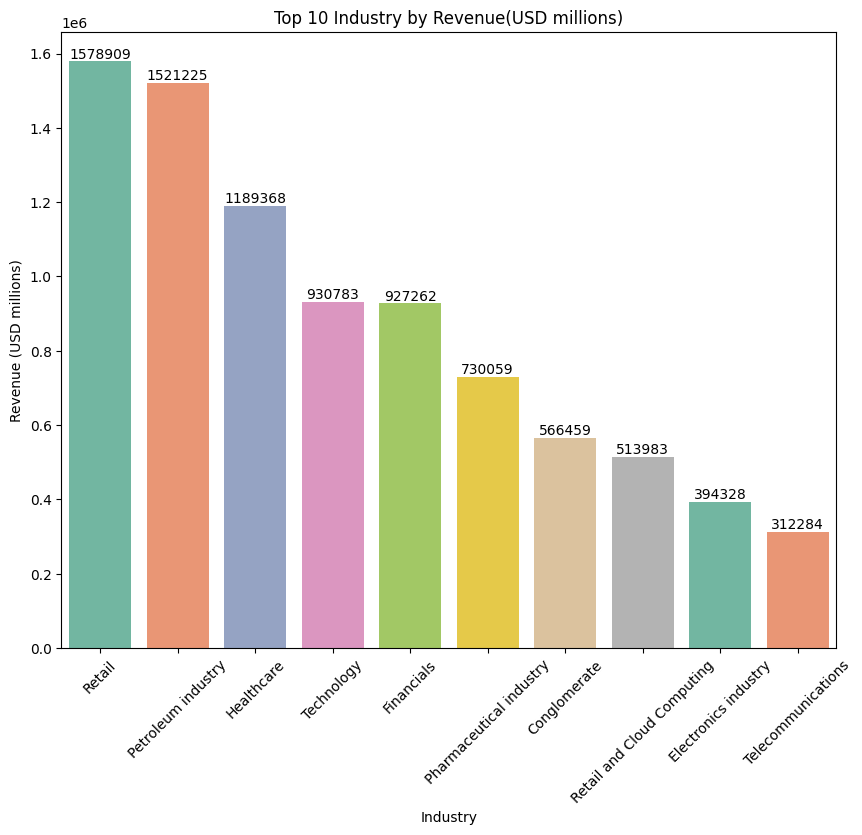

In [ ]:
## Visualization Top 10 Industry
plt.figure(figsize = (10,8))
sns.barplot(Top_Industry, x = 'Industry',y = 'Revenue (USD millions)',
            palette = 'Set2')

# Add labels above bars
for i, value in enumerate(Top_Industry['Revenue (USD millions)']):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom')

plt.title('Top 10 Industry by Revenue(USD millions)')
plt.xlabel('Industry')
plt.xticks(rotation = 45)
plt.show()

In [ ]:
## What is a companies have highest Revenue growth%
Revenue_per = df[['Name','Revenue growth %']]\
              .sort_values('Revenue growth %',ascending = False)\
              .head(10)
Revenue_per

,Name,Revenue growth %
65,TD Synnex,97.2
71,World Fuel Services,88.4
97,United Airlines,82.5
93,PBF Energy,71.8
48,ConocoPhillips,69.9
86,Delta Air Lines,69.2
90,American Airlines,63.9
92,Performance Food Group,61.6
17,Valero Energy,58.0
60,StoneX Group,55.3


<ipython-input-13-fde5926e3967>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(Revenue_per, x = 'Name',y = 'Revenue growth %',


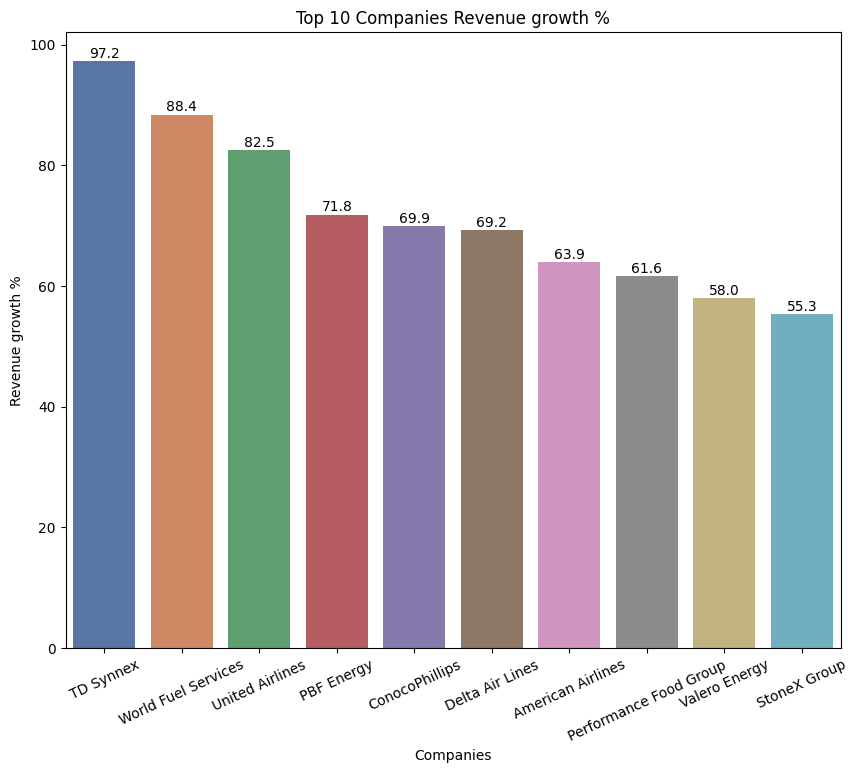

In [ ]:
## Visualization Top 10 companies % of Revenue growth
plt.figure(figsize = (10,8))
sns.barplot(Revenue_per, x = 'Name',y = 'Revenue growth %',
            palette = 'deep')

# Add labels above bars
for i, value in enumerate(Revenue_per['Revenue growth %']):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom')

plt.title('Top 10 Companies Revenue growth %')
plt.xlabel('Companies')
plt.xticks(rotation = 25)
plt.show()

In [ ]:
##What is highest number of companies in industry
Industry_count = df['Industry'].value_counts()\
                 .head(10)
Industry_count = pd.DataFrame(Industry_count)
Industry_count

,count
Industry,
Financials,11
Retail,10
Petroleum industry,10
Technology,8
Pharmaceutical industry,7
Healthcare,6
Insurance,5
Conglomerate,4
Telecommunications,3


<ipython-input-15-779704f396f8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(Industry_count, x = 'Industry',y = 'count',


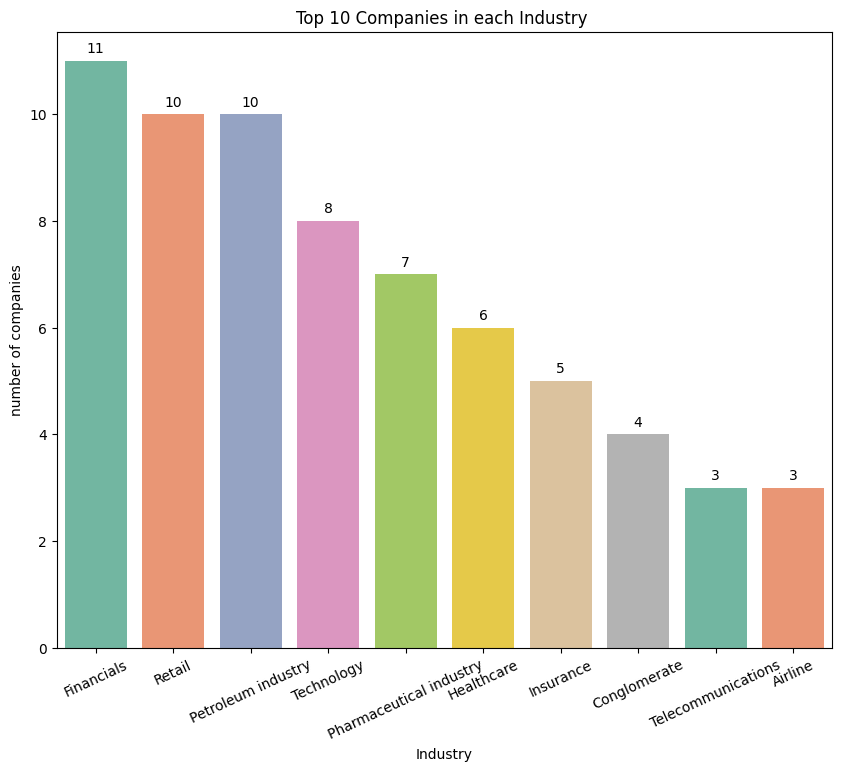

In [ ]:
#Visualization number of companies in each Industry
plt.figure(figsize = (10,8))
sns.barplot(Industry_count, x = 'Industry',y = 'count',
            palette = 'Set2')

# Add labels above bars
for i, value in enumerate(Industry_count['count']):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom')

plt.title('Top 10 Companies in each Industry ')
plt.xlabel('Industry')
plt.ylabel('number of companies')
plt.xticks(rotation = 25)
plt.show()

In [ ]:
## What is top 10 companies have highest employee
Top_employee = df[['Name','Employees']]\
               .sort_values('Employees',ascending = False)\
               .head(10)
Top_employee

,Name,Employees
0,Walmart,2100000
1,Amazon,1540000
51,United States Postal Service,576000
40,FedEx,518249
19,The Home Depot,471600
32,Target Corporation,440000
23,Kroger,430000
36,United Parcel Service,404700
4,UnitedHealth Group,400000
6,Berkshire Hathaway,383000


<ipython-input-17-165469a5bf56>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(Top_employee, x = 'Name',y = 'Employees',


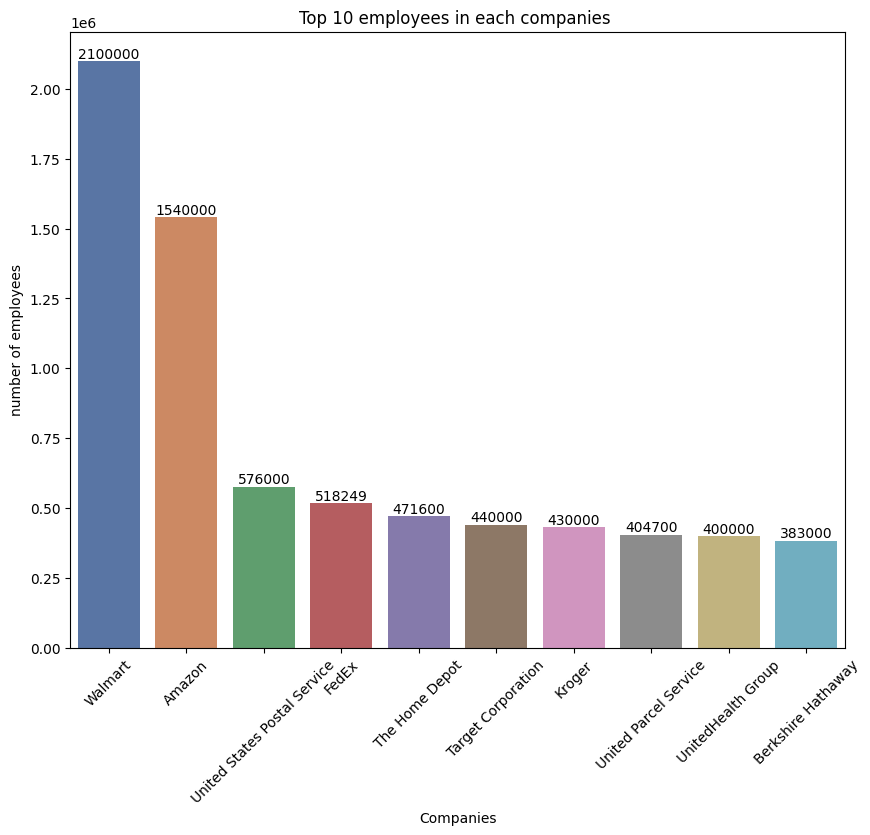

In [ ]:
#Visualization
plt.figure(figsize = (10,8))
sns.barplot(Top_employee, x = 'Name',y = 'Employees',
            palette = 'deep')

# Add labels above bars
for i, value in enumerate(Top_employee['Employees']):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom')

plt.title('Top 10 employees in each companies ')
plt.xlabel('Companies')
plt.ylabel('number of employees')
plt.xticks(rotation = 45)
plt.show()

In [ ]:
## Which state has the most companies Headquarters?
Headquarters = df['Headquarters'].value_counts().head(10)
Headquarters = pd.DataFrame(Headquarters)
Headquarters

,count
Headquarters,
"New York City, New York",12
"Houston, Texas",5
"Atlanta, Georgia",3
"Chicago, Illinois",3
"Cincinnati, Ohio",2
"Boston, Massachusetts",2
"Deerfield, Illinois",2
"Washington, D.C.",2
"Dallas, Texas",2


<ipython-input-19-f15c4e00f9d2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(Headquarters, x = 'Headquarters',y = 'count',


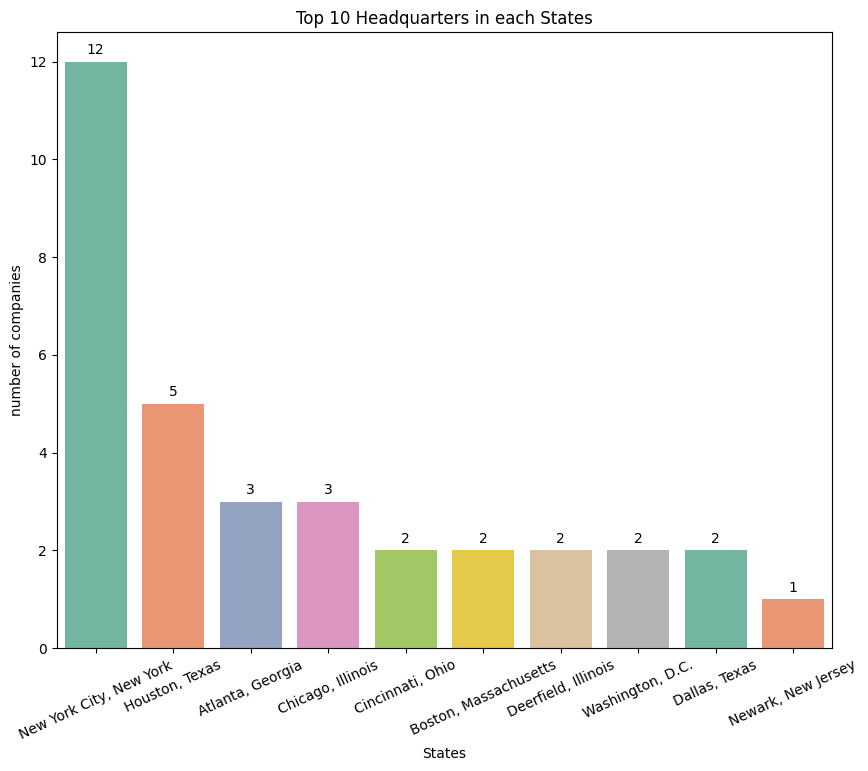

In [ ]:
#Visualization top 10 Headquarters in each states
plt.figure(figsize = (10,8))
sns.barplot(Headquarters, x = 'Headquarters',y = 'count',
            palette = 'Set2')

# Add labels above bars
for i, value in enumerate(Headquarters['count']):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom')

plt.title('Top 10 Headquarters in each States')
plt.xlabel('States')
plt.ylabel('number of companies')
plt.xticks(rotation = 25)
plt.show()

In [ ]:
## Watch Correlation of Companies Revenue and Employees

corr = df['Revenue (USD millions)'].corr(df['Employees'])
print("Correlation of Revenue(USD millions) and Number of Employees :",corr)

Correlation of Revenue(USD millions) and Number of Employees : 0.6420106517622858
